<a href="https://colab.research.google.com/github/esheffi3/ML4105/blob/main/4105_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Eric Sheffield
4105 Homework 1
Student ID: 801205219
```



# 1.1

In [254]:
# Step 1: Load the dataset and import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/esheffi3/ML4105

data=pd.read_csv('ML4105/Assignments/Assignment 1/D3.csv')

fatal: destination path 'ML4105' already exists and is not an empty directory.


In [255]:
# Step 2: Separate the data
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
Y = data['Y'].values

In [256]:
# Step 3: Implement gradient descent
def gradient_descent(X, Y, learning_rate=0.01, iterations=1000):
    m = len(Y)
    theta = np.zeros(2)  # Initialize parameters to zero
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient

        # Calculate mean squared error (loss)
        loss = np.mean(errors ** 2)
        losses.append(loss)

    return theta, losses

In [257]:
# Step 4: Train linear regression models for each variable with different learning rates
learning_rates = [0.1, 0.05, 0.01]
results = {}

for lr in learning_rates:
    theta1, losses1 = gradient_descent(np.column_stack((np.ones(len(X1)), X1)), Y, learning_rate=lr)
    theta2, losses2 = gradient_descent(np.column_stack((np.ones(len(X2)), X2)), Y, learning_rate=lr)
    theta3, losses3 = gradient_descent(np.column_stack((np.ones(len(X3)), X3)), Y, learning_rate=lr)

    results[lr] = {
        'theta1': theta1,
        'losses1': losses1,
        'theta2': theta2,
        'losses2': losses2,
        'theta3': theta3,
        'losses3': losses3
    }

In [258]:
# Step 5: Print the equations for the linear models
for lr, result in results.items():
    print(f"Learning Rate: {lr}")
    print("Equation for Linear Model with X1:", f"Y = {result['theta1'][0]:.2f} + {result['theta1'][1]:.2f} * X1")
    print("Equation for Linear Model with X2:", f"Y = {result['theta2'][0]:.2f} + {result['theta2'][1]:.2f} * X2")
    print("Equation for Linear Model with X3:", f"Y = {result['theta3'][0]:.2f} + {result['theta3'][1]:.2f} * X3")
    print()

Learning Rate: 0.1
Equation for Linear Model with X1: Y = 5.93 + -2.04 * X1
Equation for Linear Model with X2: Y = 0.74 + 0.56 * X2
Equation for Linear Model with X3: Y = 2.87 + -0.52 * X3

Learning Rate: 0.05
Equation for Linear Model with X1: Y = 5.93 + -2.04 * X1
Equation for Linear Model with X2: Y = 0.74 + 0.56 * X2
Equation for Linear Model with X3: Y = 2.87 + -0.52 * X3

Learning Rate: 0.01
Equation for Linear Model with X1: Y = 5.29 + -1.79 * X1
Equation for Linear Model with X2: Y = 0.69 + 0.58 * X2
Equation for Linear Model with X3: Y = 2.59 + -0.41 * X3



# 1.2

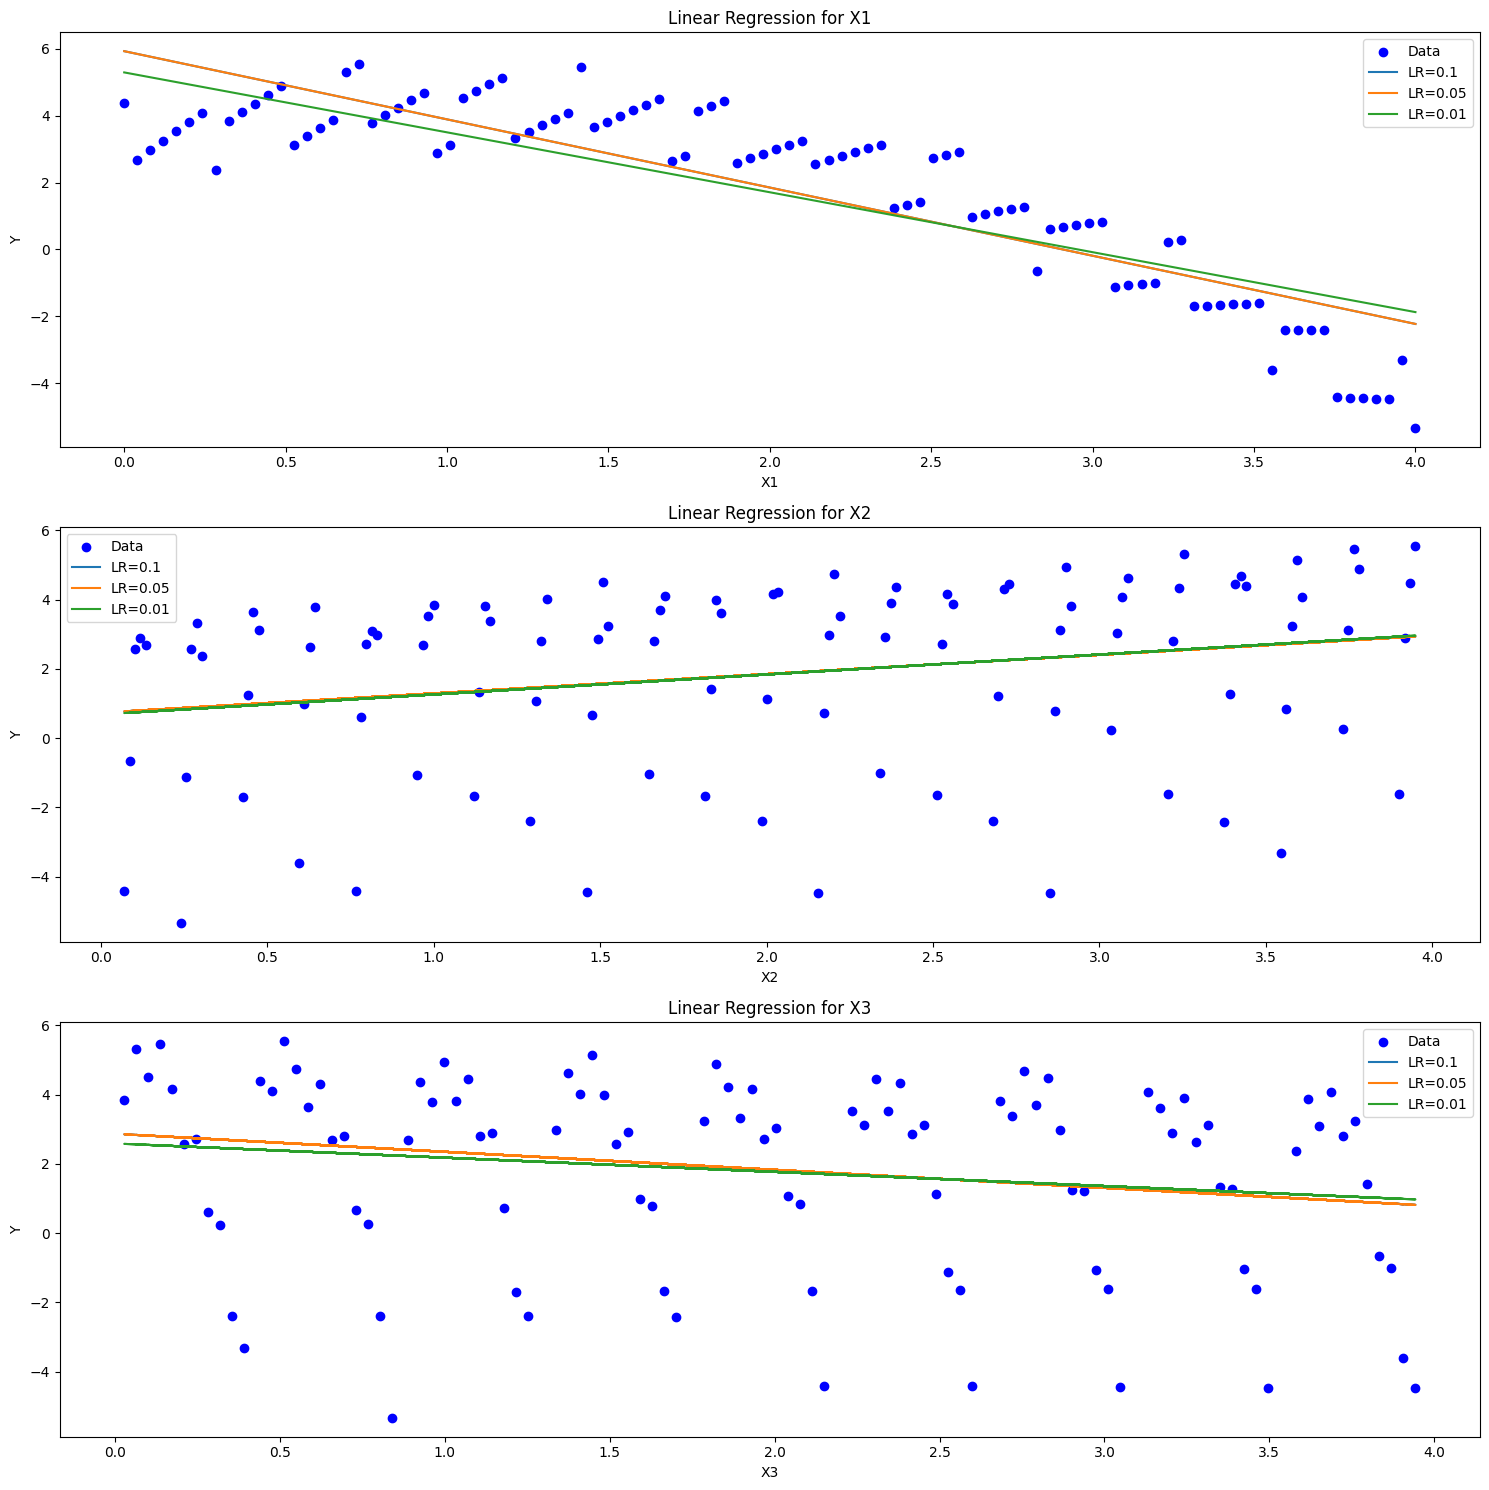

In [259]:
# Step 6: Plot the scatter plots and linear models for each explanatory variable separately with different colors for each learning rate
plt.figure(figsize=(15, 15))

# Iterate over each explanatory variable
for i, var in enumerate(['X1', 'X2', 'X3'], start=1):
    plt.subplot(3, 1, i)
    plt.scatter(data[var], Y, color='blue', label='Data')

    # Iterate over each learning rate
    for lr, result in results.items():
        plt.plot(data[var], np.column_stack((np.ones(len(data[var])), data[var])).dot(result[f'theta{i}']), label=f'LR={lr}')

    plt.xlabel(var)
    plt.ylabel('Y')
    plt.title(f'Linear Regression for {var}')
    plt.legend()

plt.tight_layout()
plt.show()

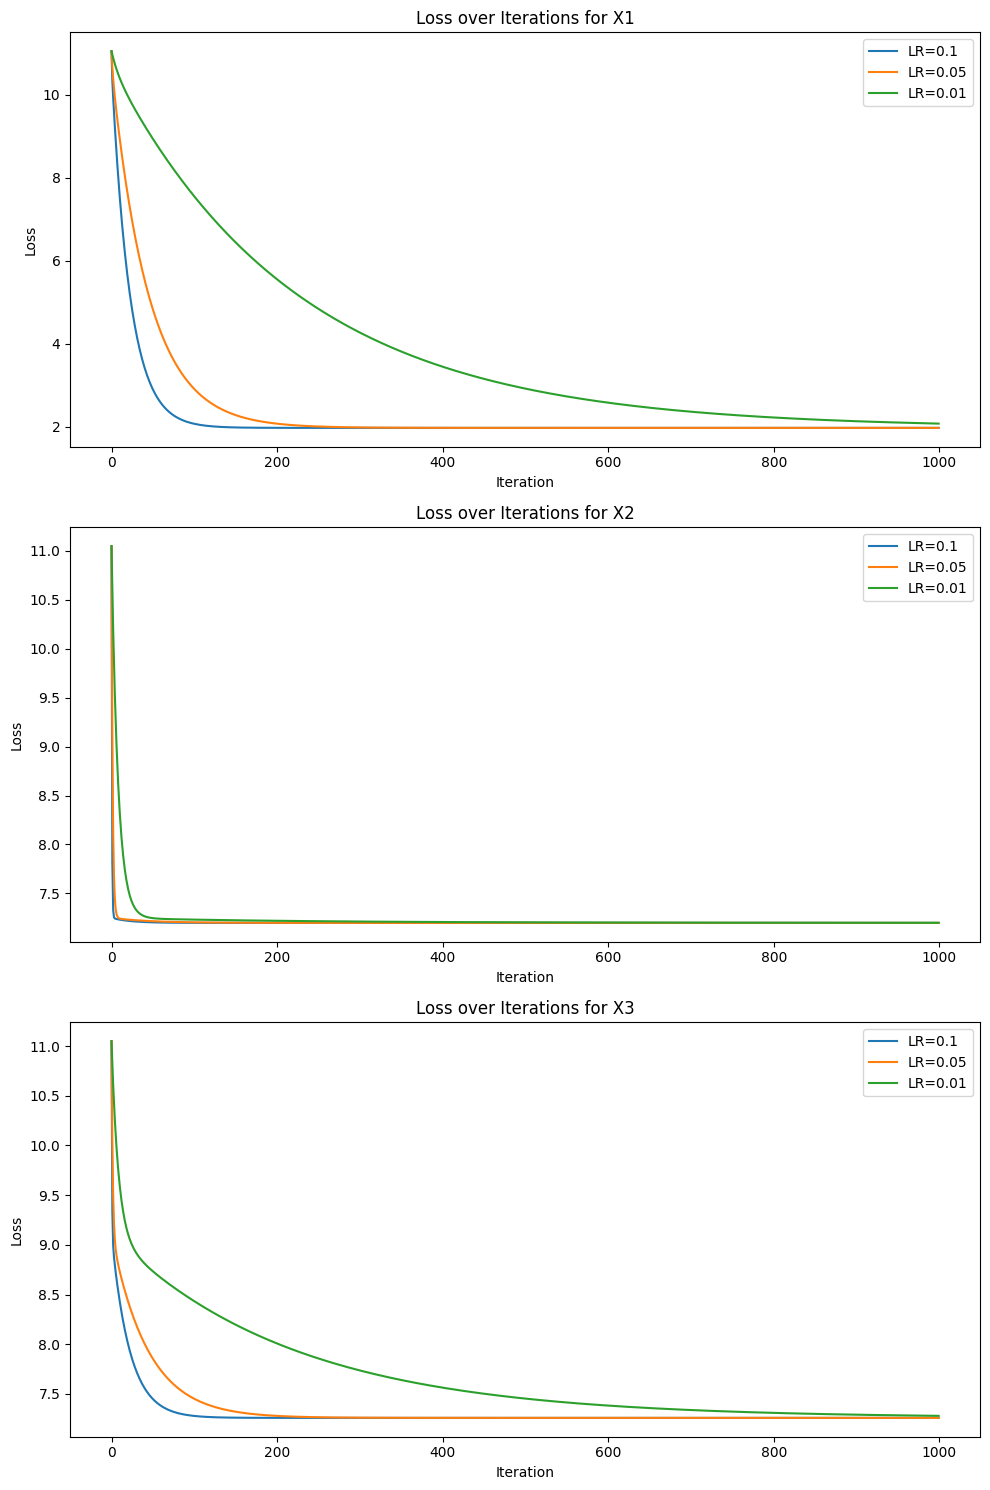

In [260]:
# Step 7: Plot loss over iterations for each explanatory variable and learning rate
plt.figure(figsize=(10, 15))

# Iterate over each explanatory variable
for i, var in enumerate(['X1', 'X2', 'X3'], start=1):
    plt.subplot(3, 1, i)

    # Iterate over each learning rate
    for lr, result in results.items():
        plt.plot(range(len(result[f'losses{i}'])), result[f'losses{i}'], label=f'LR={lr}')

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss over Iterations for {var}')
    plt.legend()

plt.tight_layout()
plt.show()

# 1.3

In [261]:
# Step 8: Determine which explanatory variable has the lower loss
final_loss1 = losses1[-1]
final_loss2 = losses2[-1]
final_loss3 = losses3[-1]

min_loss = min(final_loss1, final_loss2, final_loss3)

if min_loss == final_loss1:
    print("Explanatory variable X1 has the lower loss.")
elif min_loss == final_loss2:
    print("Explanatory variable X2 has the lower loss.")
else:
    print("Explanatory variable X3 has the lower loss.")

Explanatory variable X1 has the lower loss.


# 1.4

Impact on final loss:


> Higher learning rates tend to converge more quickly but may overshoot the optimal solution. Lower learning rates have slower convergence but are more likely to converge to the optimal solution.

Impact on number of training iterations:



> Higher learning rates require fewer training iterations to converge. Lower learning rates require more iterations to converge.





# 2.1

In [262]:
# Step 9: Separate the data into one
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

# Step 10: Implement gradient descent for multiple variables
def gradient_descent_multi(X, Y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Initialize parameters to zero
    X = np.column_stack((np.ones(m), X))  # Add intercept term

    losses = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient

        # Calculate mean squared error (loss)
        loss = np.mean(errors ** 2)
        losses.append(loss)

    return theta, losses

# Step 11: Train linear regression models for all variables simultaneously with different learning rates
learning_rates = [0.1, 0.05, 0.01]
results_multi = {}

for lr in learning_rates:
    theta_multi, losses_multi = gradient_descent_multi(X, Y, learning_rate=lr)
    results_multi[lr] = {
        'theta': theta_multi,
        'losses': losses_multi
    }

    print(f"Learning Rate: {lr}")
    print("Equation for Linear Model:", f"Y = {theta_multi[0]:.2f} + {theta_multi[1]:.2f} * X1 + {theta_multi[2]:.2f} * X2 + {theta_multi[3]:.2f} * X3")
    print()

# Print the equations for the linear models
for lr, result in results_multi.items():
    print(f"Learning Rate: {lr}")
    print("Equation for Linear Model:", f"Y = {result['theta'][0]:.2f} + {result['theta'][1]:.2f} * X1 + {result['theta'][2]:.2f} * X2 + {result['theta'][3]:.2f} * X3")
    print()

# Step 12: Determine which model has the lowest final loss
best_lr = None
best_loss = float('inf')

for lr, result in results_multi.items():
    final_loss = result['losses'][-1]
    if final_loss < best_loss:
        best_loss = final_loss
        best_lr = lr

best_model = results_multi[best_lr]
print("Best Linear Model:")
print("Learning Rate:", best_lr)
print("Equation for Linear Model:", f"Y = {best_model['theta'][0]:.2f} + {best_model['theta'][1]:.2f} * X1 + {best_model['theta'][2]:.2f} * X2 + {best_model['theta'][3]:.2f} * X3")
print("Final Loss:", best_loss)

Learning Rate: 0.1
Equation for Linear Model: Y = 5.31 + -2.00 * X1 + 0.53 * X2 + -0.27 * X3

Learning Rate: 0.05
Equation for Linear Model: Y = 5.28 + -2.00 * X1 + 0.54 * X2 + -0.26 * X3

Learning Rate: 0.01
Equation for Linear Model: Y = 3.40 + -1.73 * X1 + 0.85 * X2 + 0.02 * X3

Learning Rate: 0.1
Equation for Linear Model: Y = 5.31 + -2.00 * X1 + 0.53 * X2 + -0.27 * X3

Learning Rate: 0.05
Equation for Linear Model: Y = 5.28 + -2.00 * X1 + 0.54 * X2 + -0.26 * X3

Learning Rate: 0.01
Equation for Linear Model: Y = 3.40 + -1.73 * X1 + 0.85 * X2 + 0.02 * X3

Best Linear Model:
Learning Rate: 0.1
Equation for Linear Model: Y = 5.31 + -2.00 * X1 + 0.53 * X2 + -0.27 * X3
Final Loss: 1.476928488956765


# 2.2

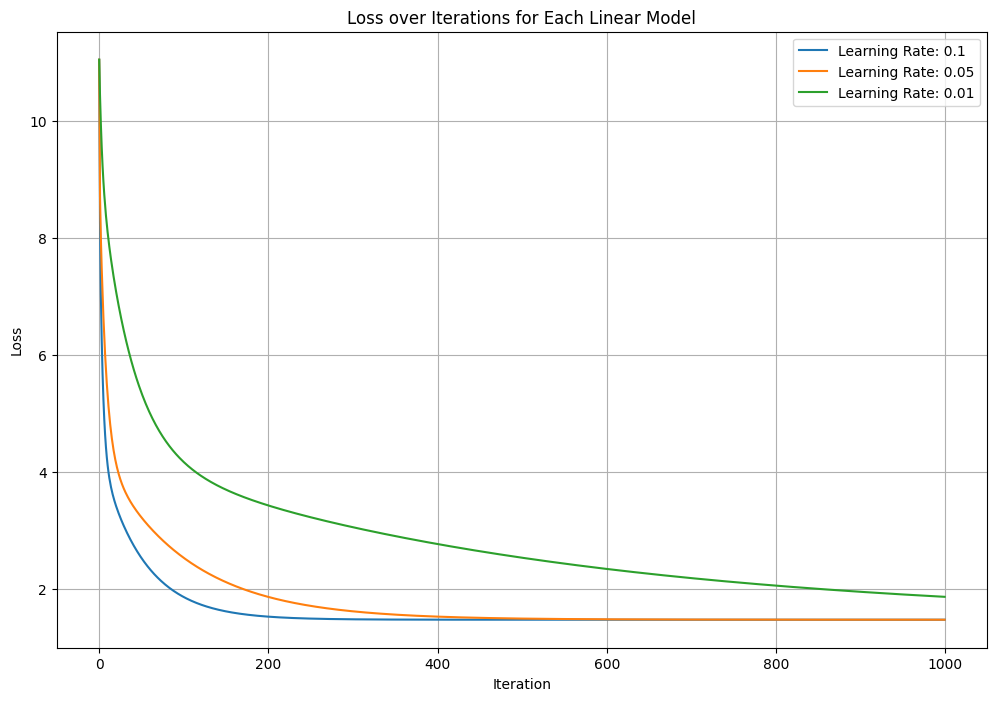

In [263]:
# Step 13: Plot loss over the iteration

plt.figure(figsize=(12, 8))

for lr, result in results_multi.items():
    plt.plot(range(len(result['losses'])), result['losses'], label=f'Learning Rate: {lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Each Linear Model')
plt.legend()
plt.grid(True)
plt.show()

# 2.3

The behavior of the learning rates on final loss and number of training iterations is about the same as previously in 1.4, however this model seemed to overshoot more based on the loss over iterations graph for all three learning rate values.

# 2.4

In [264]:
# Step 14: Predict values of y for new X values
# New values of (X1, X2, X3)
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

# Predict the value of Y for the new values using the best linear model
predictions = np.column_stack((np.ones(new_values.shape[0]), new_values)).dot(best_model['theta'])

print("Predictions for new (X1, X2, X3) values:")
for i, pred in enumerate(predictions):
    print(f"For ({new_values[i][0]}, {new_values[i][1]}, {new_values[i][2]}), predicted Y = {pred:.2f}")

Predictions for new (X1, X2, X3) values:
For (1, 1, 1), predicted Y = 3.58
For (2, 0, 4), predicted Y = 0.24
For (3, 2, 1), predicted Y = 0.10
